In [1]:
from IPython.display import HTML
HTML(open('../style.css', 'r').read())

This notebook contains a test for the function `toNFA` implemented in the notebook `03-Regexp-2-NFA.ipynb`.
In order to write regular expressions conveniently, we need the parser implemented in `RegExp-Parser.ipynb`.

In [2]:
%run 03-Regexp-2-NFA.ipynb
%run RegExp-Parser.ipynb

Version 1.0.6


The nb_mypy extension is already loaded. To reload it, use:
  %reload_ext nb_mypy


The `nb_mypy` extension does not work with notebooks that are imported via the `%run`magic.  
Therefore, we have to switch the extension off in this notebook.

In [3]:
%unload_ext nb_mypy

If the regular expression `r` that is defined below has been written in the style of the lecture notes, it would read:
$$(\texttt{a}\cdot\texttt{b} + \texttt{b}\cdot\texttt{a})^*$$

In [13]:
r = parse('a*ba*')
r

((('a', '*'), '⋅', 'b'), '⋅', ('a', '*'))

In [14]:
converter = RegExp2NFA({'a', 'b'}) 

We use `converter` to create an <span style="font-variant:small-caps;">NFA</span>  that accepts the language 
described by the regular expression `r`.

In [15]:
nfa = converter.toNFA(r) 
nfa

({1, 2, 3, 4, 5, 6, 7, 8, 9, 10},
 {'a', 'b'},
 {(1, 'a'): {2},
  (3, '𝜀'): {1, 4},
  (2, '𝜀'): {1, 4},
  (5, 'b'): {6},
  (4, '𝜀'): {5},
  (7, 'a'): {8},
  (9, '𝜀'): {7, 10},
  (8, '𝜀'): {7, 10},
  (6, '𝜀'): {9}},
 3,
 {10})

In [16]:
%run FSM-2-Dot.ipynb

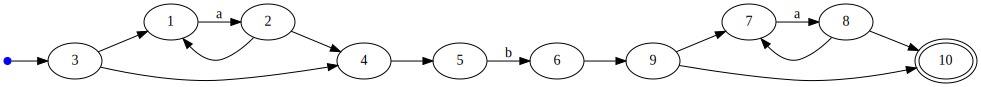

In [17]:
d = nfa2dot(nfa) 
d       

After having constructed a non-deterministic <span style="font-variant:small-caps;">Fsm</span> for the regular expression,
we convert it into a deterministic <span style="font-variant:small-caps;">Fsm</span>.

In [18]:
%run 01-NFA-2-DFA.ipynb

Version 1.0.6


In [19]:
%unload_ext nb_mypy

In [20]:
dfa = nfa2dfa(nfa) 
dfa

({frozenset(),
  frozenset({1, 3, 4, 5}),
  frozenset({6, 7, 9, 10}),
  frozenset({7, 8, 10}),
  frozenset({1, 2, 4, 5})},
 {'a', 'b'},
 {(frozenset({1, 3, 4, 5}), 'b'): frozenset({6, 7, 9, 10}),
  (frozenset({1, 3, 4, 5}), 'a'): frozenset({1, 2, 4, 5}),
  (frozenset({6, 7, 9, 10}), 'b'): frozenset(),
  (frozenset({6, 7, 9, 10}), 'a'): frozenset({7, 8, 10}),
  (frozenset({7, 8, 10}), 'b'): frozenset(),
  (frozenset({7, 8, 10}), 'a'): frozenset({7, 8, 10}),
  (frozenset(), 'b'): frozenset(),
  (frozenset(), 'a'): frozenset(),
  (frozenset({1, 2, 4, 5}), 'b'): frozenset({6, 7, 9, 10}),
  (frozenset({1, 2, 4, 5}), 'a'): frozenset({1, 2, 4, 5})},
 frozenset({1, 3, 4, 5}),
 {frozenset({7, 8, 10}), frozenset({6, 7, 9, 10})})

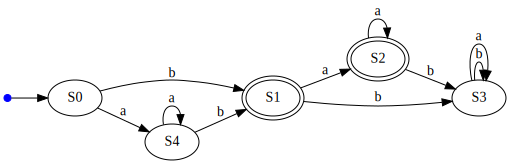

In [21]:
d, StateNames = dfa2dot(dfa) 
d

Note that the resulting DFA is not minimal, since we can identify some states.

In [ ]:
StateNames